In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


LTSM RNN

In [41]:
сравнение 
прогнозирование, мо, нн, экн модели, сравниваем между собой
визуализация
универсальная система, прогнозирует эеонометрисеки временной ряд 

система, закинуть временной ряд, получить прогноз ряда используя выбор модели
получаем результаты, подбирем под ряд оптимальную модель прогнозирования

пример
стоимость акций, 

NameError: name 'сравнение' is not defined

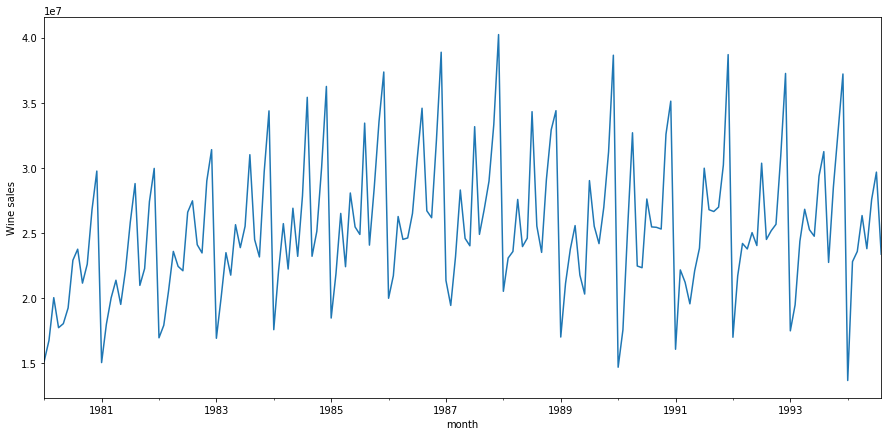

In [2]:
wine = pd.read_csv('wine.csv',',', index_col=['month'], parse_dates=['month'], dayfirst=True)
wine.sales = wine.sales * 1000
plt.figure(figsize(15,7))
wine.sales.plot()
plt.ylabel('Wine sales')
pylab.show()


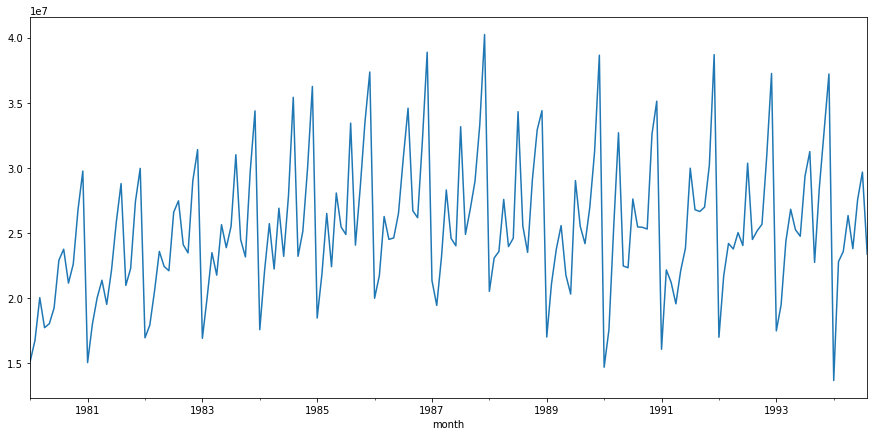

In [3]:
wine.sales.plot()

In [4]:
# Преобразуем данные
wine_2 = pd.DataFrame()

for i in range(12,0,-1):
    wine_2['t-'+str(i)] = wine.sales.shift(i)

wine_2['t'] = wine.sales.values

print(wine_2.head(23))




                  t-12        t-11        t-10         t-9         t-8  \
month                                                                    
1980-01-01         NaN         NaN         NaN         NaN         NaN   
1980-02-01         NaN         NaN         NaN         NaN         NaN   
1980-03-01         NaN         NaN         NaN         NaN         NaN   
1980-04-01         NaN         NaN         NaN         NaN         NaN   
1980-05-01         NaN         NaN         NaN         NaN         NaN   
1980-06-01         NaN         NaN         NaN         NaN         NaN   
1980-07-01         NaN         NaN         NaN         NaN         NaN   
1980-08-01         NaN         NaN         NaN         NaN         NaN   
1980-09-01         NaN         NaN         NaN         NaN  15136000.0   
1980-10-01         NaN         NaN         NaN  15136000.0  16733000.0   
1980-11-01         NaN         NaN  15136000.0  16733000.0  20016000.0   
1980-12-01         NaN  15136000.0  16

In [5]:
можно поменьше разбить, например на 6
можно логарифмировать/сгладить

SyntaxError: invalid syntax (<ipython-input-5-8ab08203e5d2>, line 1)

In [7]:
#  Отрезаем первые 12 строк
wine_4 = wine_2[12:]

wine_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
month,,,,,,,,,,,,,
1981-01-01,15136000.0,16733000.0,20016000.0,17708000.0,18019000.0,19227000.0,22893000.0,23739000.0,21133000.0,22591000.0,26786000.0,29740000.0,15028000
1981-02-01,16733000.0,20016000.0,17708000.0,18019000.0,19227000.0,22893000.0,23739000.0,21133000.0,22591000.0,26786000.0,29740000.0,15028000.0,17977000
1981-03-01,20016000.0,17708000.0,18019000.0,19227000.0,22893000.0,23739000.0,21133000.0,22591000.0,26786000.0,29740000.0,15028000.0,17977000.0,20008000
1981-04-01,17708000.0,18019000.0,19227000.0,22893000.0,23739000.0,21133000.0,22591000.0,26786000.0,29740000.0,15028000.0,17977000.0,20008000.0,21354000
1981-05-01,18019000.0,19227000.0,22893000.0,23739000.0,21133000.0,22591000.0,26786000.0,29740000.0,15028000.0,17977000.0,20008000.0,21354000.0,19498000


In [9]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = wine_4['t']
# Предикторы - таблица X
X = wine_4.drop('t', axis=1)

In [10]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:150]
y_train = y[:150]
X_test  = X[150:]
y_test  = y[150:]

In [11]:
#  Все хорошо?
print(wine_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(164, 13)
(150, 12)
(150,)
(14, 12)
(14,)


In [12]:
в таргет 12, 11 в х


SyntaxError: invalid syntax (<ipython-input-12-be90ec82b715>, line 1)

In [13]:
#  Все хорошо?
print(X_train.head(5))

                  t-12        t-11        t-10         t-9         t-8  \
month                                                                    
1981-01-01  15136000.0  16733000.0  20016000.0  17708000.0  18019000.0   
1981-02-01  16733000.0  20016000.0  17708000.0  18019000.0  19227000.0   
1981-03-01  20016000.0  17708000.0  18019000.0  19227000.0  22893000.0   
1981-04-01  17708000.0  18019000.0  19227000.0  22893000.0  23739000.0   
1981-05-01  18019000.0  19227000.0  22893000.0  23739000.0  21133000.0   

                   t-7         t-6         t-5         t-4         t-3  \
month                                                                    
1981-01-01  19227000.0  22893000.0  23739000.0  21133000.0  22591000.0   
1981-02-01  22893000.0  23739000.0  21133000.0  22591000.0  26786000.0   
1981-03-01  23739000.0  21133000.0  22591000.0  26786000.0  29740000.0   
1981-04-01  21133000.0  22591000.0  26786000.0  29740000.0  15028000.0   
1981-05-01  22591000.0  26786000.0  2

In [14]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [15]:
from keras.models import Sequential
from keras.layers import Dense


In [34]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
# внутренний слой с 8 нейронами, 12 столбцов 
model.add(Dense(8, input_dim=12, activation='relu'))
# выходной слой с линейной комбинацией. Почему не логистическая ?
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mae', optimizer='adam', metrics = ['mae'])
# model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])
# model.compile(loss='mape', optimizer='adam', metrics = ['mape'])


# Training a model
model.fit(X_train, y_train, epochs=250, batch_size=None)



Epoch 1/250
5/5 [==============================] - 0s 1ms/step - loss: 36688556.0000 - mae: 36688556.0000
Epoch 2/250
5/5 [==============================] - 0s 1ms/step - loss: 34684032.0000 - mae: 34684032.0000
Epoch 3/250
5/5 [==============================] - 0s 1ms/step - loss: 32781814.0000 - mae: 32781814.0000
Epoch 4/250
5/5 [==============================] - 0s 2ms/step - loss: 31031290.0000 - mae: 31031290.0000
Epoch 5/250
5/5 [==============================] - 0s 1ms/step - loss: 29481462.0000 - mae: 29481462.0000
Epoch 6/250
5/5 [==============================] - 0s 1ms/step - loss: 28082276.0000 - mae: 28082276.0000
Epoch 7/250
5/5 [==============================] - 0s 1ms/step - loss: 26837754.0000 - mae: 26837754.0000
Epoch 8/250
5/5 [==============================] - 0s 1ms/step - loss: 25725536.0000 - mae: 25725536.0000
Epoch 9/250
5/5 [==============================] - 0s 1ms/step - loss: 24694488.0000 - mae: 24694488.0000
Epoch 10/250
5/5 [============================

In [35]:
# оценка качества модели на тестовом множестве
# что здесь не так?
scores = model.evaluate(X_test, y_test)
# print("\nMAE: %.2f%%" % (scores[1]))
print("\n MSE: %.2f%%" % (scores[1]))
# print("\n MAPE: %.2f%%" % (scores[1]))

1/1 [==============================] - 0s 998us/step - loss: 4523988.5000 - mae: 4523988.5000

 MSE: 4523988.50%


In [36]:
# Вычисляем прогноз
predictions = model.predict(X_test)


In [37]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [38]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 12)
(150,)
(14, 12)
(14,)


In [39]:
#   было 108 наблюдений

#   отбросили 12 стало 96
#   train 91
#   test  5


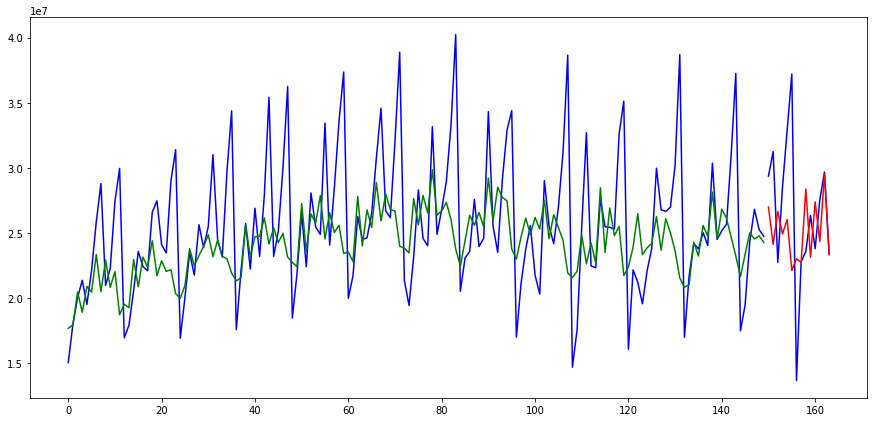

In [40]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)¶

x2 = numpy.arange(0, 150, 1)

x3 = numpy.arange(150, 164, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



вывести по одному году, отследить пик а НГ